In [20]:
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree, datasets, svm, grid_search
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [21]:
df = pd.read_csv("student/student-por.csv",";")

In [22]:
# procesamiento de la data

df["out_tem"] = ((df["G1"]+df["G2"]+df["G3"]) / 3)
    
df_target = df['out_tem'].apply(lambda x: 1 if x>10 else 0 )

df.drop(labels=["G1","G2","G3","out_tem"], axis=1)

df = pd.get_dummies(df,drop_first=True)    


In [23]:
# separando la data
X_train, X_test, y_train, y_test = train_test_split(df,df_target, test_size=0.2)

In [26]:
# Entrenando el arbol de decision
clf = RandomForestClassifier(criterion='entropy',n_estimators=5, random_state=1)
clf.fit(X_test, y_test)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [27]:
# Ejecutando validación cruzada
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(scores)

[ 1.          1.          1.          0.98058252  1.        ]


In [28]:
# Definiendo el espacio de búsqueda de nuestro algoritmo
parameters = {
'n_estimators': [1,2,3,4,5,6,7,8,9,10],
'criterion': ['gini','entropy']
}

clf = RandomForestClassifier(random_state=1)

#score = 'accuracy' #Pasando como texto
#Creando un scorer
accuracy_scorer = make_scorer(accuracy_score)
gridCV = grid_search.GridSearchCV(clf, parameters, scoring=accuracy_scorer, cv = 5) #
gridCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [29]:
print("Mejor exactitud: ", gridCV.best_score_)
print("Resultados parciales: ", gridCV.grid_scores_)
print("Mejor conjunto de parámetros: ", gridCV.best_params_)

Mejor exactitud:  1.0
Resultados parciales:  [mean: 0.98844, std: 0.01553, params: {'criterion': 'gini', 'n_estimators': 1}, mean: 0.97495, std: 0.01288, params: {'criterion': 'gini', 'n_estimators': 2}, mean: 0.99422, std: 0.01165, params: {'criterion': 'gini', 'n_estimators': 3}, mean: 1.00000, std: 0.00000, params: {'criterion': 'gini', 'n_estimators': 4}, mean: 0.99615, std: 0.00777, params: {'criterion': 'gini', 'n_estimators': 5}, mean: 1.00000, std: 0.00000, params: {'criterion': 'gini', 'n_estimators': 6}, mean: 1.00000, std: 0.00000, params: {'criterion': 'gini', 'n_estimators': 7}, mean: 1.00000, std: 0.00000, params: {'criterion': 'gini', 'n_estimators': 8}, mean: 1.00000, std: 0.00000, params: {'criterion': 'gini', 'n_estimators': 9}, mean: 1.00000, std: 0.00000, params: {'criterion': 'gini', 'n_estimators': 10}, mean: 0.98844, std: 0.01413, params: {'criterion': 'entropy', 'n_estimators': 1}, mean: 0.97881, std: 0.01641, params: {'criterion': 'entropy', 'n_estimators': 2},

In [30]:
#Ejecutando el mejor modelo
pred_test = gridCV.predict(X_test)

from sklearn.metrics import classification_report
classes = ['0', '1','2']
print(classification_report(y_test, pred_test, target_names=classes))
print(accuracy_score(y_test,pred_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        42
          1       1.00      1.00      1.00        88

avg / total       1.00      1.00      1.00       130

1.0


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_test)

array([[42,  0],
       [ 0, 88]])

In [11]:
svc = svm.SVC(kernel='poly')
C_s = np.logspace(-10, 0, 10)
scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X_train, y_train)
    print(str(C) + " - " + str(this_scores))
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

1e-10 - [ 0.69364162  0.69364162  0.69364162]
1.29154966501e-09 - [ 0.69364162  0.69364162  0.69364162]
1.6681005372e-08 - [ 0.69364162  0.69364162  0.69364162]
2.15443469003e-07 - [ 0.69364162  0.69364162  0.69364162]
2.78255940221e-06 - [ 0.69942197  0.69364162  0.69364162]
3.5938136638e-05 - [ 0.98265896  0.97109827  0.97109827]
0.000464158883361 - [ 0.97687861  0.98843931  0.98265896]
0.00599484250319 - [ 1.          1.          0.99421965]
0.0774263682681 - [ 0.99421965  1.          0.98843931]
1.0 - [ 0.99421965  1.          0.98843931]


In [12]:
# Importando el método 
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', svm.SVC(kernel='linear', random_state=1))])

In [13]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='clf__C',param_range=param_range, cv=10)

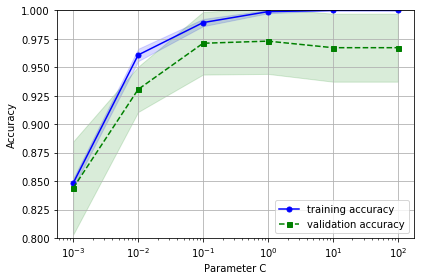

In [14]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

import matplotlib.pyplot as plt
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()